In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [13]:
# Load the data
data = pd.read_csv("feature.csv")

# Replace boolean values
data.replace(True, 1, inplace=True)
data.replace(False, 0, inplace=True)

# Extract labels
y = data["File"]
data = data.drop(columns="File")

# Encode labels
encoder = LabelEncoder()
encoder.fit(y)
Y = encoder.transform(y)

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(data))


C:\Users\Kanav\AppData\Local\Temp\ipykernel_1928\1307979147.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(False, 0, inplace=True)


In [14]:
# Define the neural network model
input_dim = X.shape[1]

model = Sequential()
model.add(Dense(256, input_dim=input_dim, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


c:\Users\Kanav\Documents\urlclassifier\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Train the model (use dummy values if needed)
model.fit(X, Y, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 5)

In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the target labels
Y = to_categorical(Y, num_classes=5)


In [ ]:
model.fit(X, Y, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


ValueError: Attr 'Toutput_types' of 'OptionalFromValue' Op passed list of length 0 less than minimum 1.

In [ ]:
from tensorflow.keras import backend as K

# Clear previous models and sessions
K.clear_session()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

# Clear previous models and sessions
K.clear_session()

# Load and preprocess the data
file_path = 'feature.csv'
data = pd.read_csv(file_path)

# Drop irrelevant column
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Encode the target variable
y = data_cleaned['File']
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Drop the target from feature data
X = data_cleaned.drop(columns=['File'])

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# One-hot encode the target labels
Y_one_hot = to_categorical(y_encoded, num_classes=len(encoder.classes_))

# Define the neural network model
input_dim = X_scaled.shape[1]
model = Sequential([
    Dense(256, input_dim=input_dim, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    
    Dense(32, activation='relu'),
   
    Dense(16, activation='relu'),
    Dense(len(encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_scaled, Y_one_hot, epochs=100, batch_size=32, validation_split=0.2)

# Print final training results
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_accuracy:.4f}")
print(f"Final Validation Accuracy: {val_accuracy:.4f}")


Epoch 1/100


c:\Users\Kanav\Documents\urlclassifier\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1364/1364 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5113 - loss: 1.0701 - val_accuracy: 0.0373 - val_loss: 10.2433
Epoch 2/100
1364/1364 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7351 - loss: 0.6378 - val_accuracy: 0.0407 - val_loss: 12.3226
Epoch 3/100
 578/1364 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7790 - loss: 0.5381

In [32]:
from sklearn.metrics import classification_report

# Predict the classes for the validation set
y_pred = model.predict(X_scaled)

# Convert one-hot predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the one-hot encoded true values to class labels
y_true_classes = np.argmax(Y_one_hot, axis=1)

# Print classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=encoder.classes_))


1705/1705 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step
                       precision    recall  f1-score   support

Benign_list_big_final       0.78      0.67      0.72     11000
           Defacement       0.00      0.00      0.00     10001
      Malware_dataset       0.54      0.58      0.56     11565
     phishing_dataset       0.46      0.53      0.49      9965
         spam_dataset       0.46      0.82      0.59     12000

             accuracy                           0.53     54531
            macro avg       0.45      0.52      0.47     54531
         weighted avg       0.46      0.53      0.48     54531



c:\Users\Kanav\Documents\urlclassifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kanav\Documents\urlclassifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kanav\Documents\urlclassifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

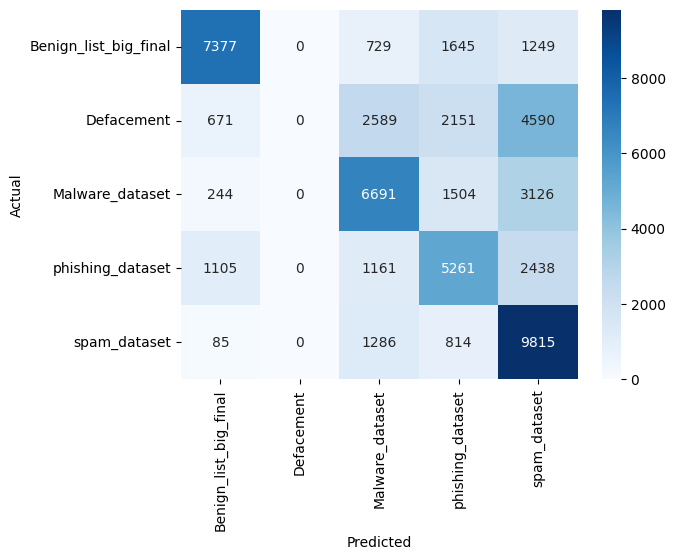

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
